In [108]:
import pandas as pd
import numpy as np
import math
import sklearn.model_selection
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv")
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df['0'].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [39]:
y=df['0']

In [40]:
x=df.iloc[:,1:]

In [41]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [42]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x=x.apply(lambda x:((x)/128.0).astype(np.float64))

In [44]:
x=x.apply(lambda x:np.floor(x))


In [45]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.8,random_state=20)

In [47]:
y_train

237035    18
123110    13
347835    22
155343    14
200512    15
          ..
31962      2
220060    16
285919    19
37135      2
354778    23
Name: 0, Length: 297960, dtype: int64

In [48]:
N = len(y_train)
N

297960

In [55]:
y_count = y_train.value_counts(sort=False)
# y_count = np.array(y_count, dtype=np.float64)
y_count

18    38726
13    15200
22     8649
14    46349
15    15500
3      8116
20    23304
2     18706
24     8611
17     9241
4      9129
19    18015
0     11139
25     4892
11     9192
12     9834
21     3322
10     4515
23     5082
6      4605
1      6899
9      6758
7      5728
16     4620
5       935
8       893
Name: 0, dtype: int64

In [56]:
y_count[0]

11139

In [58]:
yc=np.zeros(26)
for i in range(0,26):
  yc[i]=y_count[i]
yc

array([11139.,  6899., 18706.,  8116.,  9129.,   935.,  4605.,  5728.,
         893.,  6758.,  4515.,  9192.,  9834., 15200., 46349., 15500.,
        4620.,  9241., 38726., 18015., 23304.,  3322.,  8649.,  5082.,
        8611.,  4892.])

In [60]:
prior=np.zeros(26,dtype=np.float64)
for i in range(0, 26):
  prior[i] = yc[i]/N
prior

array([0.03738421, 0.02315411, 0.06278024, 0.02723856, 0.03063834,
       0.00313801, 0.01545509, 0.01922406, 0.00299705, 0.0226809 ,
       0.01515304, 0.03084978, 0.03300443, 0.05101356, 0.15555444,
       0.05202041, 0.01550544, 0.03101423, 0.12997047, 0.06046114,
       0.07821184, 0.01114915, 0.02902739, 0.01705598, 0.02889985,
       0.01641831])

In [61]:
df_new = pd.concat([y_train, x_train], axis=1, join='inner')
df_new

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
237035,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123110,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347835,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155343,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200512,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31962,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220060,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285919,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37135,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
a=np.array(df_new.loc[df_new['0']==2].sum(axis=0)[1:],dtype=np.float64)

(784,)

In [72]:
df_new[df_new['0']==2].shape

(18706, 785)

In [85]:
fi=[]
for i in range(0,26):
  temp=np.array(df_new.loc[df_new['0']==i].sum(axis=0)[1:],dtype=np.float64)
  size=df_new[df_new['0']==i].shape[0]
  temp=(temp+1)/(float)(size+2)
  fi.append(temp)


In [86]:
fi=np.array(fi)

In [87]:
fi.shape

(26, 784)

In [102]:
def predict(xp):
  qnumerator = np.zeros(26)
  for i in range(0,26):
    qnumi=np.float128(prior[i])
    for j in range(0,len(fi[i])):
      if xp[j]==0:
        qnumi=qnumi*(1-fi[i][j])
      else:
        qnumi=qnumi*fi[i][j]
    qnumerator[i]=qnumi
  return np.argmax(qnumerator)




In [89]:
x_test

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
263856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:

yp=np.zeros(len(x_test))

In [103]:
for i in range(0,len(x_test)):
  xp=np.array(x_test.iloc[i])
  yp[i]=predict(xp)

In [104]:
y_test_arr=np.array(y_test)
err=0.0

In [105]:
for i in range(0,len(yp)):
  if yp[i]!=y_test_arr[i]:
    err+=1
err=err/len(yp)
err



0.294469056249161

In [106]:
accuracy = 1-err
accuracy

0.705530943750839

In [107]:
confusionMat=sklearn.metrics.confusion_matrix(y_test,yp)
confusionMat

array([[1930,   47,    0,    0,    7,    1,   41,  118,    0,    9,   22,
           0,  122,   93,    7,   28,   35,   98,    0,    1,    8,    1,
          17,   83,   59,    3],
       [  80, 1279,   12,   40,   37,    0,   14,   32,    1,   35,    0,
           5,   15,   12,   39,   23,    9,   10,   41,    0,    2,    0,
           5,   10,   23,   45],
       [   1,   75, 3365,    9,  161,    7,   49,    7,    0,   31,   47,
         221,   41,   33,  266,   82,   38,   16,    2,   26,   57,    0,
         150,    0,   11,    8],
       [  19,   70,   12, 1404,    1,    0,    1,    1,    2,   92,    0,
          13,   21,   19,  210,   28,   26,    5,   17,    0,   23,    0,
          22,    0,    8,   24],
       [  34,  148,   69,    5, 1340,   55,   60,    1,    8,    7,  127,
         122,   30,   26,   15,   68,    6,   89,   40,   15,    8,    0,
           9,    3,   10,   16],
       [   1,    0,    0,    0,    6,  198,    0,    0,    0,    0,    0,
           0,    0,  

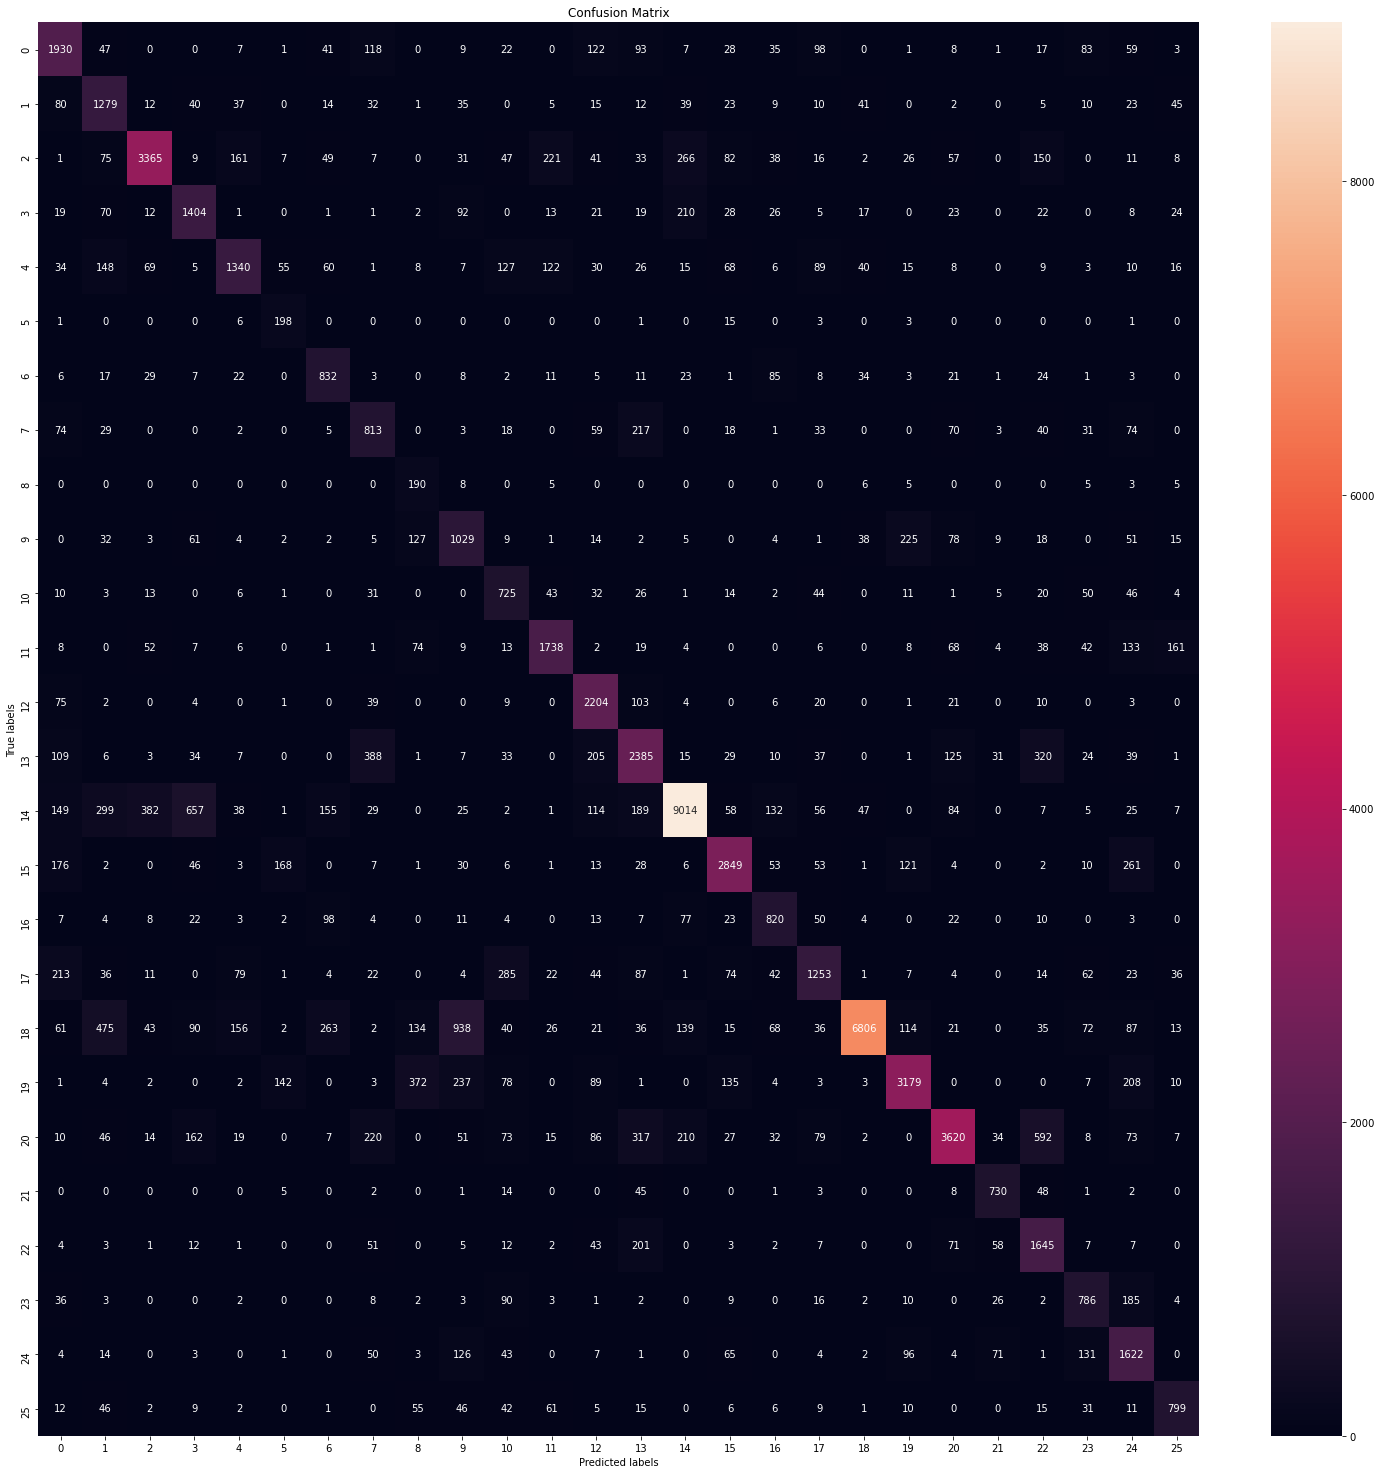

In [109]:
ax= plt.subplots(figsize=(26,26))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 